## Imports

In [1]:
import h5py 
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from math import pi,exp,sqrt
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,ParameterGrid

## Pre Processing

In [3]:
class MyPreProcessor():
  """
  My steps for pre-processing for the three datasets.
  """

  def __init__(self):
    pass
  def convert_n_to_1(self,mat):
    z=np.zeros((mat.shape[0]))
    for i in range(mat.shape[1]):
      z[mat[:,i]==1]=i
    z=z.astype(int)
    return z

  def pre_process(self, dataset):
    """
    Reading the file and preprocessing the input and output.
    Note that you will encode any string value and/or remove empty entries in this function only.
    Further any pre processing steps have to be performed in this function too. 

    Parameters
    ----------

    dataset : integer with acceptable values 0, 1, or 2
    0 ->  Dataset
    1 ->  Dataset
    2 ->  Dataset

    Returns
    -------
    X : 2-dimensional numpy array of shape (n_samples, n_features)
    y : 1-dimensional numpy array of shape (n_samples,)
    """
    scaler = StandardScaler()
    if dataset == 0:
      df=h5py.File("/content/drive/My Drive/part_A_train.h5", "r")
      X=np.array(df['X'])
      y=np.array(df['Y'])
      y=self.convert_n_to_1(y)
      X = scaler.fit_transform(X)
    
    elif dataset == 1:
      df=h5py.File("/content/drive/My Drive/part_B_train.h5", "r")
      X=np.array(df['X'])
      y=np.array(df['Y'])
      y=self.convert_n_to_1(y)
      X = scaler.fit_transform(X)

    elif dataset == 2:
      df=pd.read_csv("/content/drive/My Drive/weight-height.csv")
      df['Gender'].replace('Male',0,inplace=True)
      df['Gender'].replace('Female',1,inplace=True)
      df['Height'],df['Weight']=df['Weight'].copy(),df['Height'].copy()
      df=df.sample(frac=1,random_state=4)
     
      X=df['Height'].to_numpy()
      X=np.reshape(X,(X.shape[0],1))
      y=df['Weight'].to_numpy()
    
    return X, y

## Q1

In [4]:
def analysis(X_train, X_test, y_train, y_test):
  """
    performs Sklearn's Logistic Regression and TSNE visualization on the given dataset

    Parameters
    ----------
    X_train : 2-dimensional numpy array of shape (n_samples, n_features) 

    y_train : 1-dimensional numpy array of shape (n_samples,)

    X_test : 2-dimensional numpy array of shape (n_samples, n_features) 

    y_test : 1-dimensional numpy array of shape (n_samples,)

    Returns
    -------
    """
  logistic = LogisticRegression(max_iter=10000)
  logistic.fit(X_train,y_train)
  y_pred=logistic.predict(X_test)

  print("Accuracy:",accuracy_score(y_test,y_pred))

  tsne = TSNE(n_components=2, verbose=2, n_iter=1000)
  tsne_results = tsne.fit_transform(X_train)

  plt.figure(figsize=(16,10))
  sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=y_train,
    palette=sns.color_palette("hls", 10),
    legend="full"
  )

In [5]:
preprocessor = MyPreProcessor()
X, y = preprocessor.pre_process(0)
print(X.shape,y.shape)

(4200, 784) (4200,)


### d)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20)
freq = np.bincount(y_train)
items = np.nonzero(freq)[0]
print("Training Sample")
print("size:",y_train.shape[0])
print(*list(zip(items,freq[items]))) 
freq = np.bincount(y_test)
items = np.nonzero(freq)[0]
print("Testing Sample")
print("size:",y_test.shape[0])
print(*list(zip(items,freq[items]))) 

Training Sample
size: 3360
(0, 320) (1, 395) (2, 314) (3, 339) (4, 333) (5, 319) (6, 353) (7, 345) (8, 328) (9, 314)
Testing Sample
size: 840
(0, 80) (1, 99) (2, 79) (3, 85) (4, 83) (5, 79) (6, 88) (7, 86) (8, 82) (9, 79)


### e)

Accuracy: 0.8857142857142857
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3360 samples in 0.023s...
[t-SNE] Computed neighbors for 3360 samples in 1.215s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3360
[t-SNE] Computed conditional probabilities for sample 2000 / 3360
[t-SNE] Computed conditional probabilities for sample 3000 / 3360
[t-SNE] Computed conditional probabilities for sample 3360 / 3360
[t-SNE] Mean sigma: 4.444342
[t-SNE] Computed conditional probabilities in 0.213s
[t-SNE] Iteration 50: error = 84.1294861, gradient norm = 0.0033784 (50 iterations in 1.678s)
[t-SNE] Iteration 100: error = 80.1906357, gradient norm = 0.0268357 (50 iterations in 1.551s)
[t-SNE] Iteration 150: error = 78.5523148, gradient norm = 0.0012290 (50 iterations in 1.309s)
[t-SNE] Iteration 200: error = 78.5397339, gradient norm = 0.0000876 (50 iterations in 1.341s)
[t-SNE] Iteration 250: error = 78.5395813, gradient norm = 0.0000670 (50 iterations in 1.321s)
[t-SNE] KL

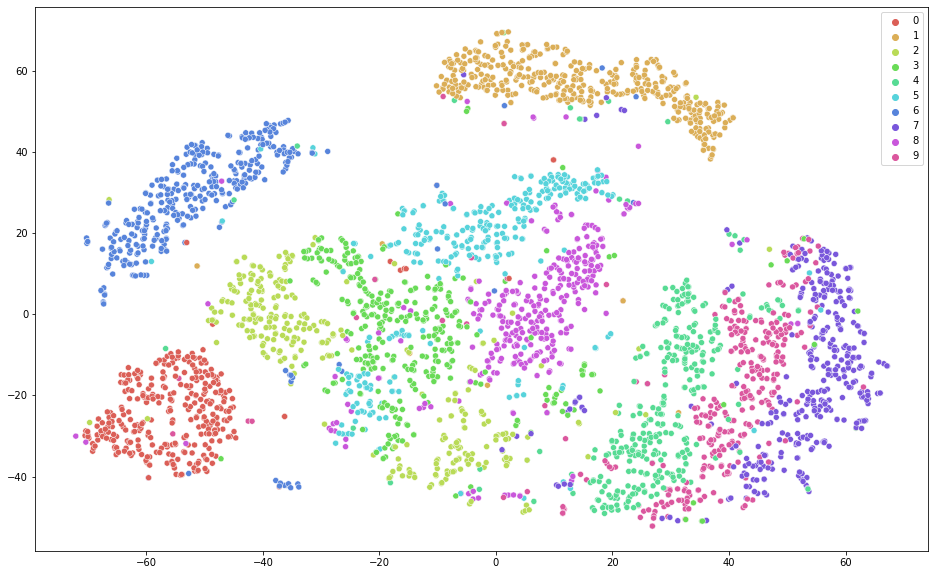

In [7]:
pca = PCA(n_components=50) 
X_train_pca = pca.fit_transform(X_train) 
X_test_pca = pca.transform(X_test) 
analysis(X_train_pca, X_test_pca, y_train, y_test)

### f)

Accuracy: 0.8869047619047619
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3360 samples in 0.020s...
[t-SNE] Computed neighbors for 3360 samples in 1.192s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3360
[t-SNE] Computed conditional probabilities for sample 2000 / 3360
[t-SNE] Computed conditional probabilities for sample 3000 / 3360
[t-SNE] Computed conditional probabilities for sample 3360 / 3360
[t-SNE] Mean sigma: 4.363270
[t-SNE] Computed conditional probabilities in 0.206s
[t-SNE] Iteration 50: error = 84.2114944, gradient norm = 0.0037324 (50 iterations in 1.697s)
[t-SNE] Iteration 100: error = 79.4583893, gradient norm = 0.0182103 (50 iterations in 1.581s)
[t-SNE] Iteration 150: error = 78.5958252, gradient norm = 0.0008275 (50 iterations in 1.342s)
[t-SNE] Iteration 200: error = 78.5836868, gradient norm = 0.0001151 (50 iterations in 1.339s)
[t-SNE] Iteration 250: error = 78.5833435, gradient norm = 0.0000467 (50 iterations in 1.313s)
[t-SNE] KL

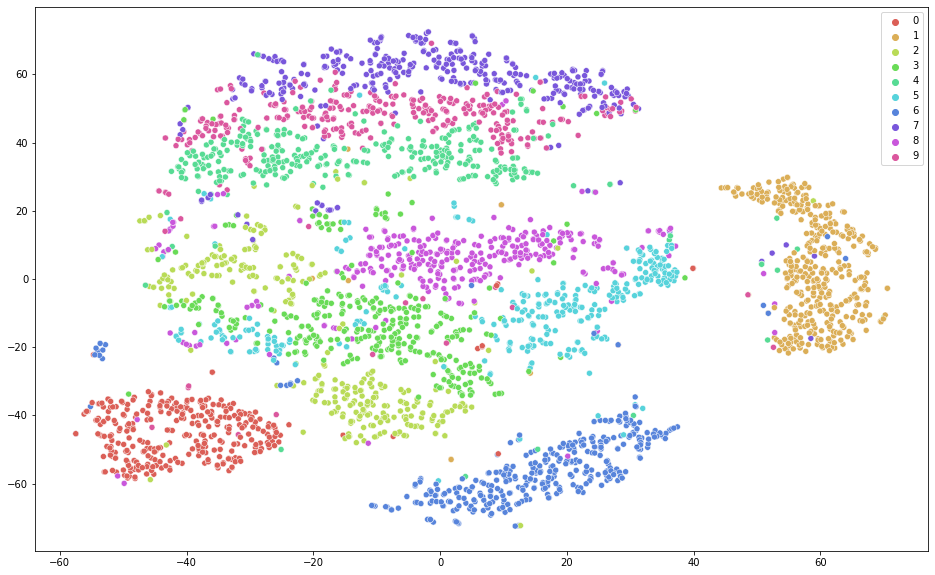

In [8]:
svd = TruncatedSVD(n_components=50)
X_train_svd=svd.fit_transform(X_train)
X_test_svd=svd.transform(X_test)
analysis(X_train_svd, X_test_svd, y_train, y_test)

## Q2

In [9]:
def create_sample(X_train,y_train):
  """
    creates a bootstrap sample from the given dataset

    Parameters
    ----------
    X_train : 2-dimensional numpy array of shape (n_samples, n_features) 

    y_train : 1-dimensional numpy array of shape (n_samples,)

    Returns
    -------
    X : 2-dimensional numpy array of shape (n_samples, n_features) 

    y : 1-dimensional numpy array of shape (n_samples,)
    """
  y=np.array([])
  X=np.array([])
  
  for i in range(y_train.shape[0]):
    idx=np.random.randint(0,y_train.shape[0]) # randomly select a sample
    X=np.append(X,X_train[idx])
    y=np.append(y,y_train[idx])
  X=X.reshape((X.shape[0],1))
  return X,y


In [146]:
preprocessor= MyPreProcessor()
X,y=preprocessor.pre_process(2)
B=100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

predictions=None
for _ in range(B):
  X_temp,y_temp=create_sample(X_train,y_train) # create Bootstrap sample

  linear=LinearRegression() 
  linear.fit(X_temp,y_temp) # Train the linear regression model using SKlearn

  temp=X_test.dot(linear.coef_)+linear.intercept_ # calculate the prediction on test dataset
  temp=temp.reshape((temp.shape[0],1))
  
  if(predictions is not None): # STore the predictions in a numpy array
    predictions=np.concatenate((predictions,temp),axis=1)
  else:
    predictions=temp
  
avg_pred=np.mean(predictions,axis=1) # Average prediction of all bootstrap samples
diff=avg_pred-y_test  

bias=abs(diff).mean() # average bias of every sample

avg=avg_pred.reshape((avg_pred.shape[0],1))
variance=(1/(B-1))*np.sum((predictions-avg)**2,axis=1)
variance=variance.mean() # average variance of every sample

y_test=y_test.reshape((y_test.shape[0],1))
MSE=(1/B)*np.sum((predictions-y_test)**2,axis=1)
MSE=MSE.mean() # average Mean Squared error of every sample

print("Bias:",bias)
print("Variance:",variance)
print("MSE:",MSE)
print(MSE-bias**2-variance)

Bias: 1.1530038210977807
Variance: 0.00047495878081340573
MSE: 2.0521863947125123
0.7222936244656158


## Q3

### a,b,c

#### GridSearch Implementation

In [194]:
class GridSearch():
  '''
  My Implementation of Grid search cross validation
  '''

  def __init__(self,estimator,params={"max_depth":None},cv=5):
    """
    Initialises the class with parameters

    Parameters
    ----------
    estimator : estimator that needs to be evaluated for best parameters 

    params : user provided Dictionary of parameters for which grid search is implemented

    k : Number of folds the data needs to be splitted into

    cv : Number of cross validation sets

    Returns
    -------
    """
    self.estimator=estimator
    self.k=cv
    self.depths=params['max_depth']
    self.grid=list(ParameterGrid(params)) # creates a grid of parameters

  def fit(self,X,y):
    validation_acc=[]
    training_acc=[]
    max_val=-1
    for i in self.grid:
      params=i
      self.estimator.set_params(**params) # update estimator with selected parameters
      val,train=self.k_fold(X,y) # calculates the kfold validation and training accuracy on selected set of parameters

      print(params,"Validation Accuracy:",val,"Training Accuracy:",train)

      validation_acc.append(val) # store the accuracy values
      training_acc.append(train)

      if(val>max_val): # store the best estimator using pickle library
        pickle.dump(self.estimator,open('model_dt-0','wb'))
        max_val=val
    
    #plot the Training and validation accuracy
    plt.plot(self.depths,validation_acc,color="g", label="validation Accuracy")
    plt.plot(self.depths,training_acc,color="r", label="training Accuracy")
    plt.xlabel('Depth')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

  def k_fold(self,X,y):
    """
    performs k fold cross validation on the given dataset with given  estimator 
    updated with selected parameters

    Parameters
    ----------
    X : 2-dimensional numpy array of shape (n_samples, n_features) 

    y : 1-dimensional numpy array of shape (n_samples,)

    Returns
    -------
    val_acc : average Validation accuracy

    train_acc : average Training accuracy
    """
    m=X.shape[0] # number of samples

    split_start=0 # initial split's first index
    split_end=m//4 # initial split's last index
    score_val=0
    score_train=0
    max_score_val=-1
    max_score_train=-1

    for i in range(self.k):
      X_train=np.concatenate((X[:split_start],X[split_end:]))
      y_train=np.concatenate((y[:split_start],y[split_end:]),axis=0)

      X_val=X[split_start:split_end]
      y_val=y[split_start:split_end]

      split_start+=100
      split_end+=100

      self.estimator.fit(X_train,y_train) # train the model
      score_val+=self.estimator.score(X_val,y_val) # calculate the validation accuracy
      score_train+=self.estimator.score(X_train,y_train) # calculate the training accuracy
      max_score_val=max(max_score_val,self.estimator.score(X_val,y_val))
      max_score_train=max(max_score_train,self.estimator.score(X_train,y_train))
    print("maximum Validation score:",max_score_val)
    print("maximum Training score:",max_score_train)

    return score_val/self.k, score_train/self.k


#### Testing

In [196]:
preprocessor = MyPreProcessor()
X, y = preprocessor.pre_process(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=40)
dt= DecisionTreeClassifier()
gnb=GaussianNB()

params = {'max_depth': list(range(2, 20))}
grid_search_cv = GridSearch(dt,params)
grid_search_cv.k_fold(X_train,y_train)

grid_search_cv.fit(X_train, y_train)

# model=pickle.load(open('model-dt-0','rb'))
# model.score(X_test,y_test)

maximum Validation score: 0.6011904761904762
maximum Training score: 0.5825396825396826


(0.5897619047619048, 0.5776984126984127)

### d

In [160]:
class Evaluation_Metric():
  '''
  My implementation of evaluation metrics
  '''
  def __init__(self,model,X,y):
    """
    Initialises the evaluation metrics

    Parameters
    ----------
    X : 2-dimensional numpy array of shape (n_samples, n_features) 

    y : 1-dimensional numpy array of shape (n_samples,)

    model : Model used to predict the values

    Returns
    -------
    """
    self.y=y
    self.y_pred=model.predict(X)
    self.prob=model.predict_proba(X)
    self.matrix=self.confusion_matrix(self.y,self.y_pred)
    
  
  def confusion_matrix(self,y,y_pred):
    """
    Creates the confusion matrix with given y and y_pred

    Parameters
    ----------
    y : 1-dimensional numpy array of shape (n_samples,) 

    y_pred : 1-dimensional numpy array of shape (n_samples,)

    Returns
    -------
    result : Created confusion matrix
    """
    K = len(np.unique(y)) # Number of classes 
    result = np.zeros((K, K))

    for i in range(len(y)):
      result[y[i]][y_pred[i]] += 1
    result=result.astype(int)

    return result

  def asses(self):
    """
    prints all the details of given dataset with given model
    
    """
    print("Confusion Matrix")
    print(tabulate(self.matrix))
    print("*-"*30)

    K = len(np.unique(self.y))
    if(K>2):
      data=np.zeros((K,3))
    else:
      data=np.zeros((1,3))
    data[:,0]=self.precision()
    data[:,1]=self.recall()
    data[:,2]=self.F1score()
   
    print(tabulate(data,headers=['Precision','Recall','F1-score']))
    

    plt.figure(figsize=(16,9))
    if(K>2):
      data=[["Accuracy/Micro-average:",self.accuracy()],["Macro-Average:", * self.macro_average()]]
      print(tabulate(data))
      for i in range(K):
        y_temp=self.y.copy()
        y_temp[y_temp==i]=K+1
        y_temp[y_temp!=K+1]=0
        y_temp[y_temp==K+1]=1
       
        FPR,TPR=self.plotROC(y_temp,self.prob[:,i])
        plt.plot(FPR,TPR,label=str(i))
      
    else:
      data=[["Accuracy:",self.accuracy()]]
      print(tabulate(data))
      FPR,TPR=self.plotROC(self.y,self.prob[:,1])
      plt.plot(FPR,TPR,label="ROC Curve")

    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    
    
  def macro_average(self):  
    """
    Calculates the macro average of precision, recall, F1score

    Parameters
    ----------
    y : 1-dimensional numpy array of shape (n_samples,) 

    y_pred : 1-dimensional numpy array of shape (n_samples,)

    Returns
    -------
    result : Created confusion matrix
    """  
    return [self.precision().mean(),self.recall().mean(),self.F1score().mean()]

  def accuracy(self):
    """
    Calculates the accuracy of dataset
    """  
    return self.matrix.trace()/self.matrix.sum()

  def precision(self):
    """
    Calculates the precision of dataset
    """  

    K = len(np.unique(self.y))
    labels=np.zeros(K)
    if(K==2):
      return self.matrix[1,1]/self.matrix[:,1].sum()

    for i in range(K):
      labels[i]=self.matrix[i][i]/self.matrix[:,i].sum()

    return labels

  def recall(self):
    """
    Calculates the recall value of dataset
    """  
    K = len(np.unique(self.y))
    labels=np.zeros(K)
    if(K==2):
      return self.matrix[1,1]/self.matrix[1].sum()

    for i in range(K):
      labels[i]=self.matrix[i][i]/self.matrix[i].sum()

    return labels

  def F1score(self):
    """
    Calculates the F1 score value of dataset
    """  
    prec=self.precision()
    recall=self.recall()
    return 2*(prec*recall)/(prec+recall)
  

  def plotROC(self,y,y_prob):
    """
    Calculates the True positive rate and false positive rate of model

    Parameters
    ----------
    y : 1-dimensional numpy array of shape (n_samples,) 

    y_prob : 1-dimensional numpy array of shape (n_samples,)

    Returns
    -------
    TPR : True Positive rate

    FPR : False Positive rate
    """  
    thresh=0
    TPR=[]
    FPR=[]
    
    while(thresh<=1):
      y_pred=y_prob.copy()
      y_pred[y_pred>=thresh]=1
      y_pred[y_pred<thresh]=0
      y_pred=y_pred.astype(int)
     
      matrix=self.confusion_matrix(y,y_pred)
     
      FPR.append(matrix[0,1]/matrix[0].sum())
      TPR.append(matrix[1,1]/matrix[1].sum())
      
      thresh+=0.0002

    return FPR,TPR
      

Confusion Matrix
---  ---
259  160
223  198
---  ---
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
  Precision    Recall    F1-score
-----------  --------  ----------
   0.553073  0.470309    0.508344
---------  --------
Accuracy:  0.544048
---------  --------


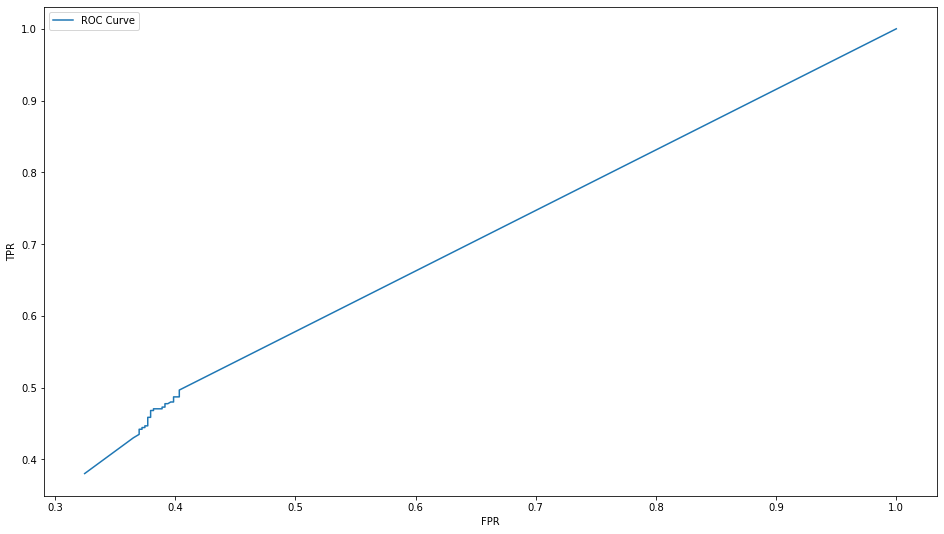

In [198]:
preprocessor = MyPreProcessor()
X, y = preprocessor.pre_process(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=40)
gnb=GaussianNB()
gnb.fit(X_train,y_train)
# model=pickle.load(open('model','rb'))
metric=Evaluation_Metric(gnb,X_test,y_test)
metric.asses()

## Q4

### Implementation

In [100]:
class NaiveBayes():
  '''
  My implementatin of Naive Bayes
  '''
  def __init__(self):
    pass

  def calculateStats(self,X,size):
    """
    calculate statistics like mean and variance of column data

    Parameters
    ----------
    X : 2-dimensional numpy array of shape (n_samples, n_features) 

    size : total size of dataset

    Returns
    -------
    stats : dictionary containing all the statistics of each label and each column
    """
    stats = np.array([[np.mean(col), np.var(col),X.shape[0]/size] for col in zip(*X)])
    return stats

  def separateByClass(self,X,y):
    """
    Separates the given dataset on the basis of labels of y

    Parameters
    ----------
    X : 2-dimensional numpy array of shape (n_samples, n_features) 

    y : 1-dimensional numpy array of shape (n_samples,)

    Returns
    -------
    separated : dictionary having labels as keys and values as associated datasets
    """
    separated={}
    for i in range(X.shape[0]):
      if(y[i] in separated):
        separated[y[i]]=np.concatenate([separated[y[i]],[X[i]]])
      else:
        separated[y[i]]=[X[i]]
    
    return separated

  def fit(self,X,y):
    """
    Trains the dataset for the naive bayes model

    Parameters
    ----------
    X : 2-dimensional numpy array of shape (n_samples, n_features) 

    y : 1-dimensional numpy array of shape (n_samples,)

    Returns
    -------
    """

      separated= self.separateByClass(X,y)
      self.stats={}
      for label in separated:
        self.stats[label]=self.calculateStats(separated[label],X.shape[0])
        
      return self.stats

  def calculateGaussian(self,x, mean, var):
    """
    calculates the log of gaussian probability value for given row and mean and variance

    Parameters
    ----------
    X : 2-dimensional numpy array of shape (1, 1) 

    mean : mean of columns

    var: variance of columns

    Returns
    -------
    """
    if(var<10**-7):
      return 0
    exponent = -((x-mean)**2 / (2 * var ))
    return np.log((1 / np.sqrt(2 * pi * var))) + exponent

  
  def calculateClassProbability(self,X):
    """
    Calculates the probabilities of each label for the row

    Parameters
    ----------
    X : 2-dimensional numpy array of shape (1, n_features) 

    Returns
    -------
    probabilities : calculated probailities of each
    """
    probabilities={}
    for label in self.stats: # for each label
      probabilities[label]=0
      for col in range(X.shape[0]): # for each column
        mean,var,_=self.stats[label][col]
        probabilities[label]+=self.calculateGaussian(X[col],mean,var) # calculates the probabilities
        # assert probabilities[label]!=float("-inf"),"data:"+str(mean)+" "+str(var) +" col:"+str(col)

    return probabilities


  def getPrediction(self,X):
    """
    calculates the prediction(label) of the row

    Parameters
    ----------
    X : 2-dimensional numpy array of shape (1, n_features) 

    Returns
    -------
    bestlabel: label having max probability
    """
    bestlabel=0
    max_prob=float("-inf")
    probabilities=self.calculateClassProbability(X) # calculate probability for each label
  
    for label in probabilities: # select the label having maximum probability
      if(max_prob<probabilities[label]):
        max_prob=probabilities[label]
        bestlabel=label
    return bestlabel


  def predict(self,X):
    """
    predicts output for given dataset

    Parameters
    ----------
    X : 2-dimensional numpy array of shape (n_samples, n_features) 

    Returns
    -------
    y : 1-dimensional numpy array of shape (n_samples,)

    """
    y=np.array([])
    for i in range(X.shape[0]):
      yi=self.getPrediction(X[i])
      y=np.append(y,yi)
    y=y.astype(int)
    return y
    

In [101]:
def naive_bayes(data,predictor):
  preprocessor = MyPreProcessor()
  X, y = preprocessor.pre_process(data)
  X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.1,random_state=40) 
  predictor.fit(X_train,y_train)
  y_pred=predictor.predict(X_test)
  return accuracy_score(y_test,y_pred)

### Dataset A

In [102]:
nb=NaiveBayes()
gnb=GaussianNB()
print("SKlearn's naive Bayes:",naive_bayes(0,gnb))
print("Custom naive Bayes:",naive_bayes(0,nb))

SKlearn's naive Bayes: 0.5523809523809524
Custom naive Bayes: 0.7238095238095238


### Dataset B

In [103]:
nb=NaiveBayes()
gnb=GaussianNB()
print("SKlearn's naive Bayes:",naive_bayes(1,gnb))
print("Custom naive Bayes:",naive_bayes(1,nb))

SKlearn's naive Bayes: 0.5404761904761904
Custom naive Bayes: 0.5404761904761904
